<a href="https://colab.research.google.com/github/lucaspinheiro27/MACHINE_LEARNING_DATA_SCIENCE/blob/main/Decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Trees
* https://en.wikipedia.org/wiki/Decision_tree_learning
* https://www.analyticsvidhya.com/blog/2021/08/decision-tree-algorithm/

------------------------------------------------------------------------------
# Notes

* Branch: Perguntas
* Nodes: Representa uma decisão
* Calcular a probabilidade toda vez que entrar em um nó interno
* Conceito de entropia significa confusão classificando como 0 e 1.
* Homogeneidade na variável de resposta sendo entropia de 0.
* Podemos ter Entropias que variam de 0 - 1.
* Sempre devemos diminuir a entropia (confusão) até chegar em um classificador
* Podemos ter múltiplas classes
* Metódo greedy ou Information gain: função de diminuir a entropia possível/Log-loss
* Max_depth: Nível máximo de profundidade da minha árvore
* Muito sensível a overfitting
* Quanto mais classes, mais propenso a erros
* Homogeneidade significa que os resultados são todos iguais
--------------------------------------------------------------------------------
# Entropy
$$E(S) = -p_{(+)} \log p_{(+)} - p_{(-)} \log p_{(-)}
i$$
# Information Gain
$$\text{Information Gain} = E(Y) - E(Y|X)$$
# Gini-Simpson Index
$$\lambda = 1 - \sum_{i=1}^{n} p_i^2$$






In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

In [2]:
df = pd.read_csv('/content/Base Arvore de Decisão - estudantes.csv')
df.sample(10)

Passed  Study Hours  Read Literature
14       1          104                0
3        0           42                1
11       1           64                1
6        0           41                1
0        0           49                1
2        0           94                0
9        0           87                0
17       1           84                1
4        0           86                0
18       1           95                1

In [3]:
x_train, x_test, y_train, y_test = train_test_split(df[['Read Literature','Study Hours']], df[['Passed']], test_size = 0.5)

In [4]:
from sklearn import metrics

classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

# Accurary: é o número de previsões corretas dividido pelo total de previsões
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.7


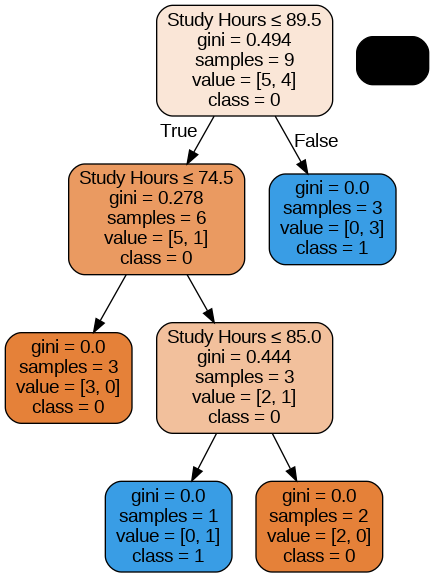

In [5]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names = ['Read Literature','Study Hours'],class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('image.png')
Image(graph.create_png())

* Muito importante testar critérios diferentes
* Aumentar o max-depth pode penalizar a acurácia do modelo
* Log_loss coloca a entropia alta
* Gini tenta manter a entropia baixa

In [6]:
from sklearn import metrics

classifier = DecisionTreeClassifier(criterion='log_loss', min_samples_leaf=1, max_depth=1)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

# Accurary: é o número de previsões corretas dividido pelo total de previsões
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7


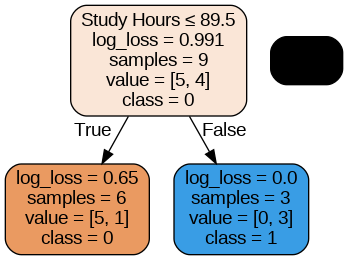

In [7]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names = ['Read Literature','Study Hours'],class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('image.png')
Image(graph.create_png())

Próximo exercício, usar base:

https://www.kaggle.com/code/reihanenamdari/brain-stroke-prediction-decisiontree


https://www.kaggle.com/code/vivek468/heartattackprediction-decisiontree

# Heart attack

In [8]:
df_ha = pd.read_csv('/content/heart.xls')
df_ha.sample(10)

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
269   56    1   0     130   283    1        0       103     1      1.6    0   
166   67    1   0     120   229    0        0       129     1      2.6    1   
58    34    1   3     118   182    0        0       174     0      0.0    2   
183   58    1   2     112   230    0        0       165     0      2.5    1   
11    48    0   2     130   275    0        1       139     0      0.2    2   
80    41    1   2     112   250    0        1       179     0      0.0    2   
132   42    1   1     120   295    0        1       162     0      0.0    2   
95    53    1   0     142   226    0        0       111     1      0.0    2   
134   41    0   1     126   306    0        1       163     0      0.0    2   
129   74    0   1     120   269    0        0       121     1      0.2    2   

     caa  thall  output  
269    0      3       0  
166    2      3       0  
58     0      2       1  
183    1      3       0  
11     0      2       1  
80     0      2       1  
132    0      2       1  
95     0      3       1  
134    0      2       1  
129    1      2       1

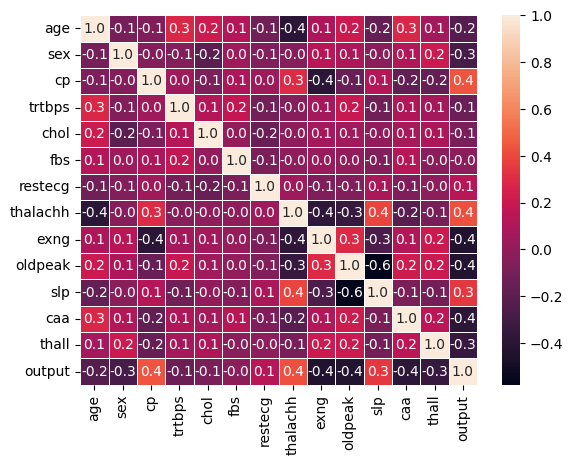

In [9]:
import seaborn as sns
correlacao = df_ha.corr()
plot = sns.heatmap(correlacao, annot = True, fmt=".1f", linewidths=.6)

In [10]:
x_train, x_test, y_train, y_test = train_test_split(df_ha[['cp', 'thalachh', 'slp', 'restecg']], df_ha[['output']], test_size = 0.5)

In [12]:
from sklearn import metrics

classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

# Accurary: é o número de previsões corretas dividido pelo total de previsões
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6842105263157895


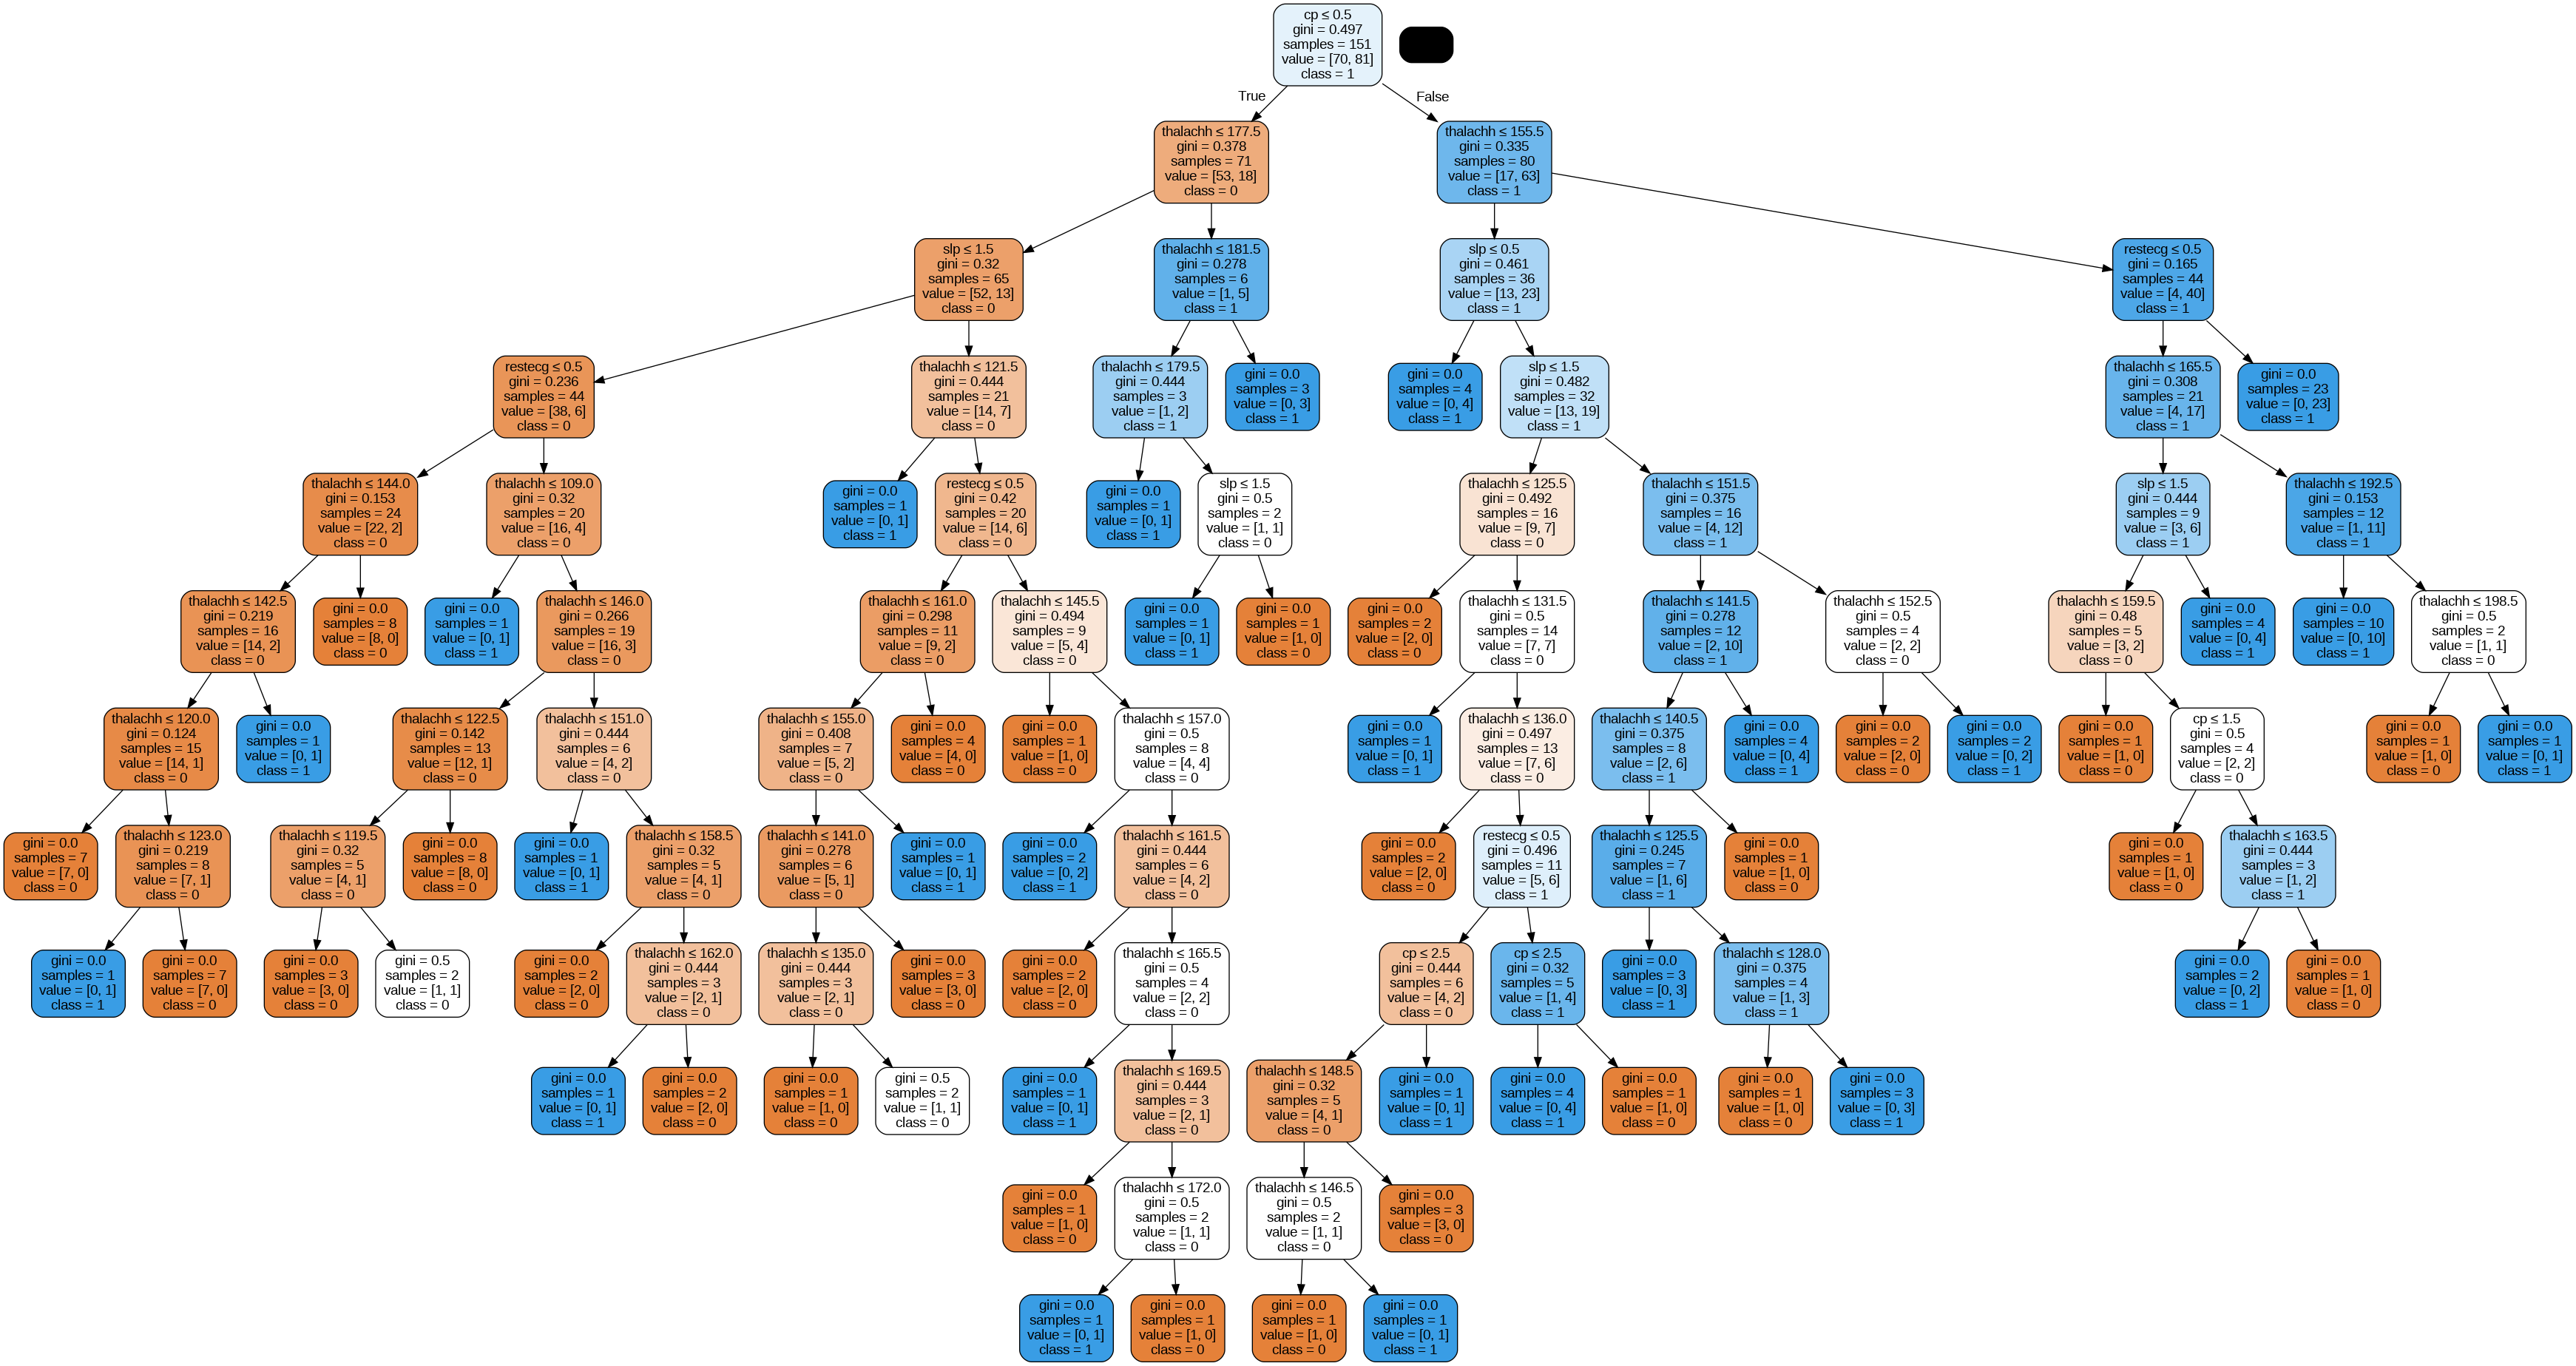

In [13]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names = ['cp', 'thalachh', 'slp', 'restecg'],class_names=['0','1', '2', '3'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('image.png')
Image(graph.create_png())

In [14]:
from sklearn import metrics

classifier = DecisionTreeClassifier(criterion='log_loss', min_samples_leaf=1)#max_depth=3
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

# Accurary: é o número de previsões corretas dividido pelo total de previsões
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6776315789473685


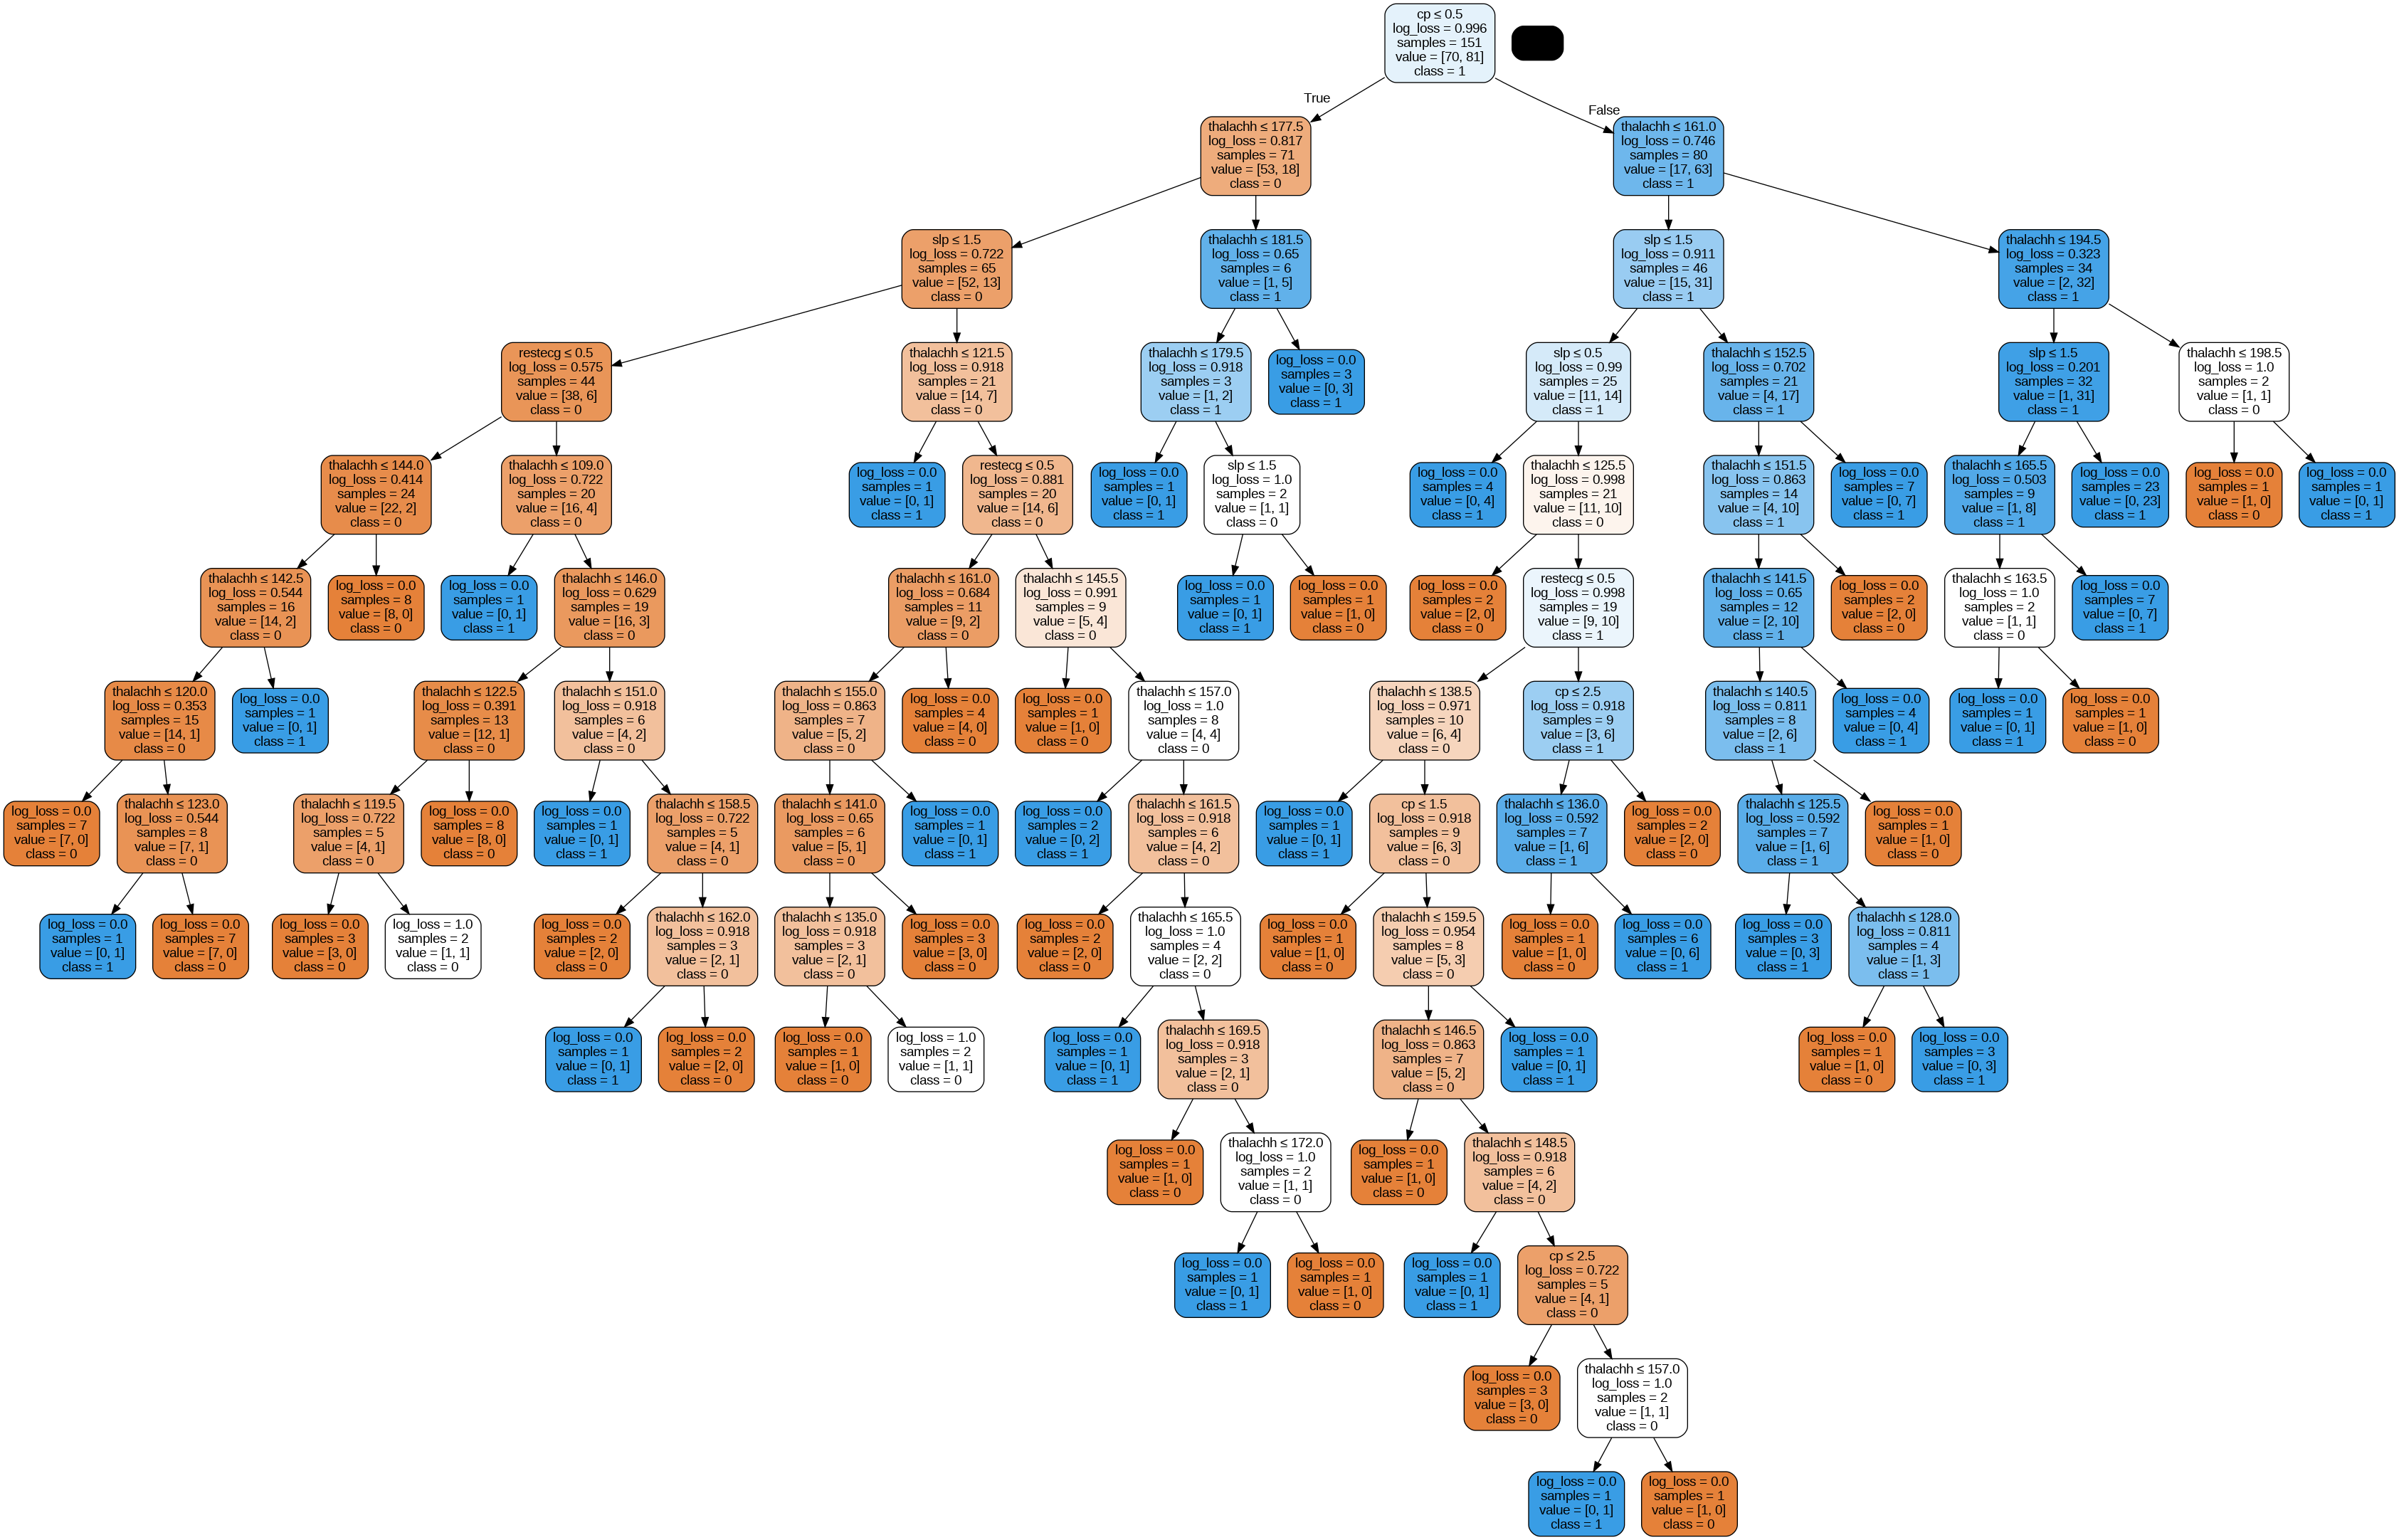

In [15]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names = ['cp', 'thalachh', 'slp', 'restecg'],class_names=['0','1', '2', '3'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('image.png')
Image(graph.create_png())

# Brain Stroke

In [16]:
df_bs = pd.read_csv('/content/full_data.csv')
df_bs.sample(10)

gender   age  hypertension  heart_disease ever_married      work_type  \
4502  Female  44.0             0              0          Yes        Private   
3211  Female  38.0             0              0          Yes        Private   
4950    Male  32.0             1              0           No       Govt_job   
4276  Female   0.4             0              0           No       children   
4889  Female  77.0             1              0          Yes  Self-employed   
4758  Female  72.0             0              0          Yes        Private   
3896  Female  35.0             0              0          Yes        Private   
1657    Male  22.0             0              0           No        Private   
2351    Male  10.0             0              0           No       children   
4481    Male  48.0             0              0          Yes       Govt_job   

     Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
4502          Rural              60.02  33.8  formerly smoked       0  
3211          Urban              71.06  22.6          Unknown       0  
4950          Urban              58.24  31.1  formerly smoked       0  
4276          Rural              85.65  17.4          Unknown       0  
4889          Urban             109.51  29.7     never smoked       0  
4758          Urban              83.89  33.1  formerly smoked       0  
3896          Rural             119.40  22.9     never smoked       0  
1657          Rural              85.57  24.2  formerly smoked       0  
2351          Rural              84.02  18.7     never smoked       0  
4481          Rural              76.58  27.4     never smoked       0

In [17]:
# df_bs = pd.get_dummies(df_bs, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'])
# df_bs

In [18]:
x_train, x_test, y_train, y_test = train_test_split(df_bs[['age','hypertension','heart_disease','avg_glucose_level', 'bmi']], df_bs[['stroke']], test_size = 0.5)

In [19]:
from sklearn import metrics

classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

# Accurary: é o número de previsões corretas dividido pelo total de previsões
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9056603773584906


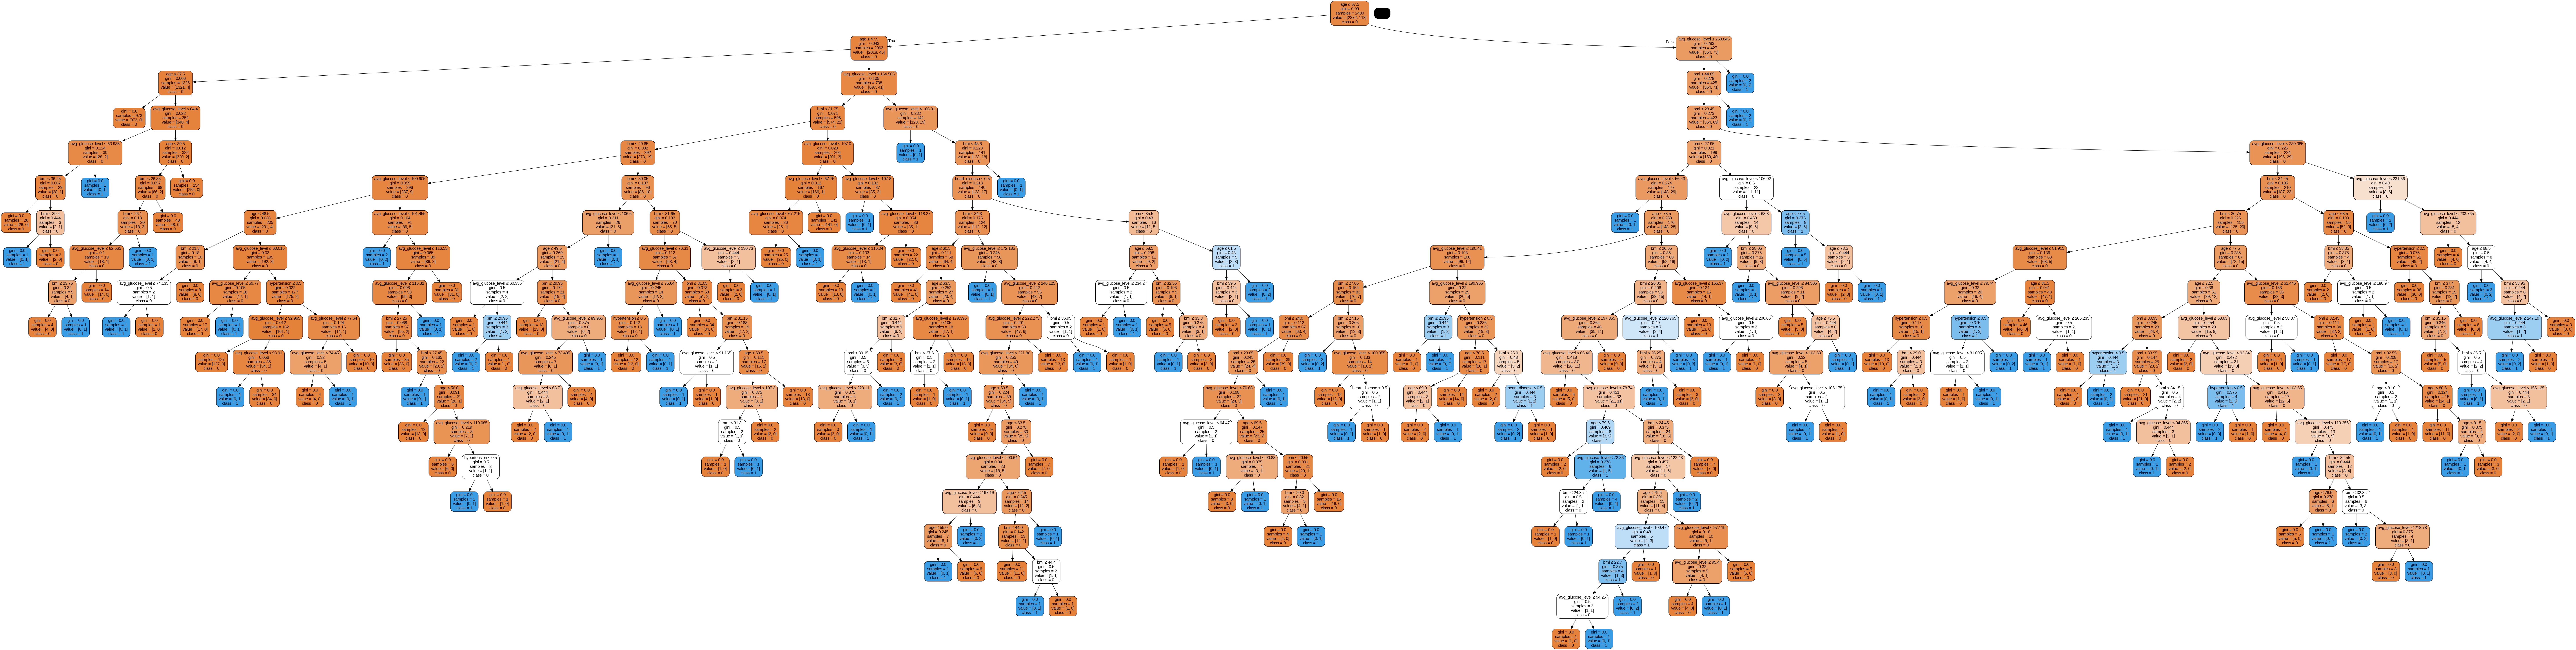

In [20]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names = ['age','hypertension','heart_disease','avg_glucose_level', 'bmi'],class_names=['0','1', '2', '3', '4'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('image.png')
Image(graph.create_png())

In [21]:
from sklearn import metrics

classifier = DecisionTreeClassifier(criterion='log_loss', min_samples_leaf=1)#max_depth=0
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

# Accurary: é o número de previsões corretas dividido pelo total de previsões
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9080690485748695


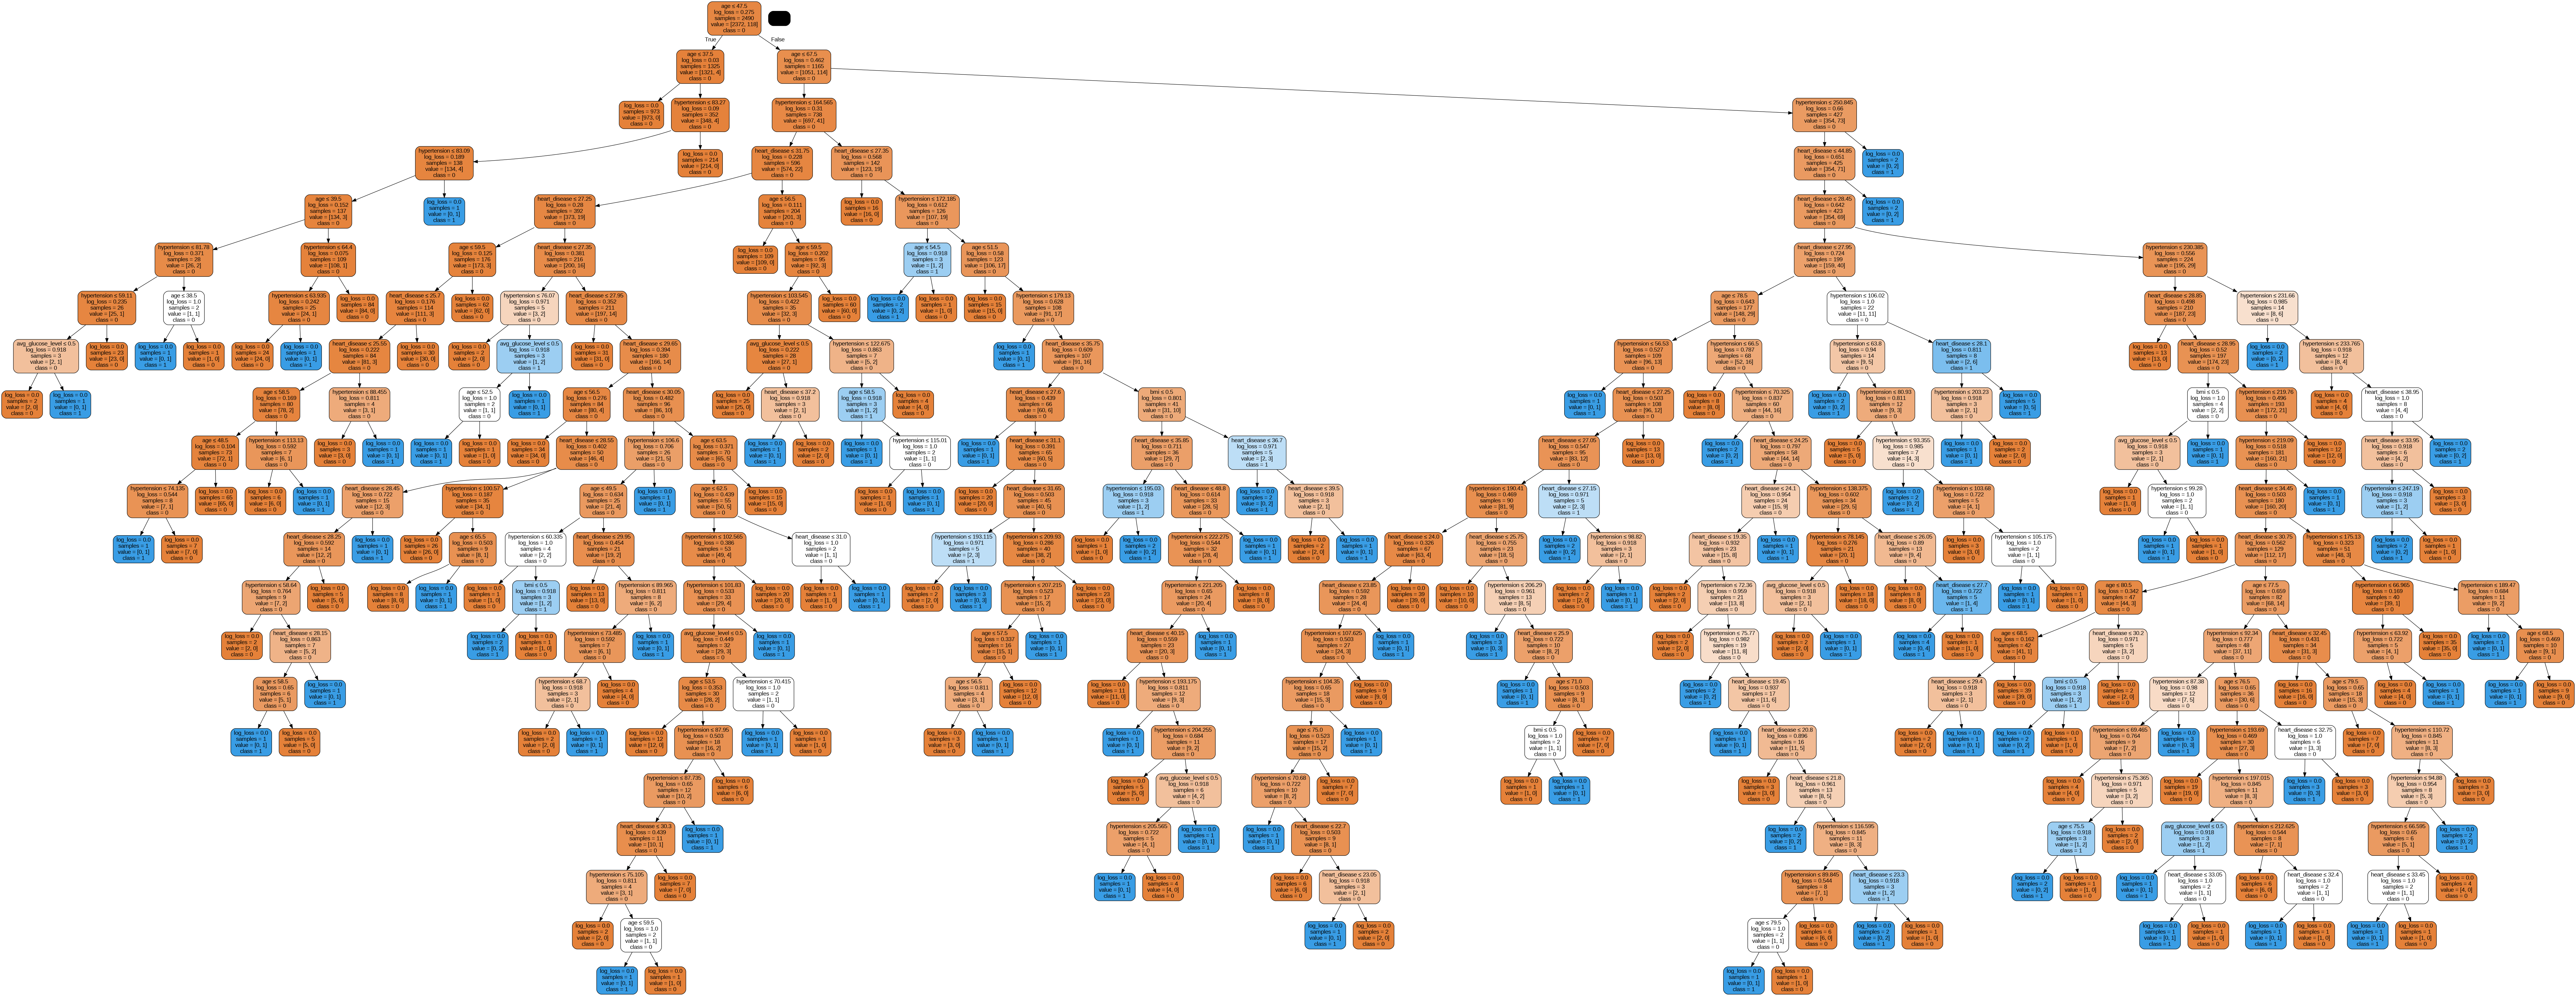

In [22]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names = ['age','avg_glucose_level','bmi','hypertension','heart_disease'],class_names=['0','1', '2', '3', '4'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('image.png')
Image(graph.create_png())